<a href="https://colab.research.google.com/github/Glamorous9754/Practice-in-Jupyter/blob/main/Classification%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Data Loading

In [33]:
import pandas as pd

# Use the 'raw' URL to access the raw CSV data
url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/Movie_classification.csv'
df = pd.read_csv(url)

# Missing Data Imputation

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
df['Time_taken'].mean()

157.3914979757085

In [ ]:
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Creation of Dummy Variable

In [ ]:
df =pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,False,False,True,False


# Dependent(y) and Independent(x) Variable Creation

In [ ]:
x = df.loc[:,df.columns != "Start_Tech_Oscar"]
y = df['Start_Tech_Oscar']

# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree Classification model

### Training Classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clfTree = DecisionTreeClassifier(max_depth=3)
clfTree.fit(x_train, y_train)

# Predict on test data
y_train_pred = clfTree.predict(x_train)
y_test_pred = clfTree.predict(x_test)

### Model Performance

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print('Confusion Matrix for training data: \n',confusion_matrix(y_train, y_train_pred))
print('\n Confusion Matrix for testing data: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score for test data: ',accuracy_score(y_test, y_test_pred))
print('\n Classification Report for test data: \n',classification_report(y_test, y_test_pred))

Confusion Matrix for training data: 
 [[172  14]
 [126  92]]

 Confusion Matrix for testing data: 
 [[39  5]
 [41 17]]
Accuracy Score for test data:  0.5490196078431373

 Classification Report for test data: 
               precision    recall  f1-score   support

           0       0.49      0.89      0.63        44
           1       0.77      0.29      0.42        58

    accuracy                           0.55       102
   macro avg       0.63      0.59      0.53       102
weighted avg       0.65      0.55      0.51       102



### Ploting Decision Tree

In [ ]:
# pip install pydotplus

In [ ]:
from sklearn import tree
from IPython.display import Image
import pydotplus


dot_data = tree.export_graphviz(clfTree, out_file=None,feature_names= x_train.columns, filled = True)

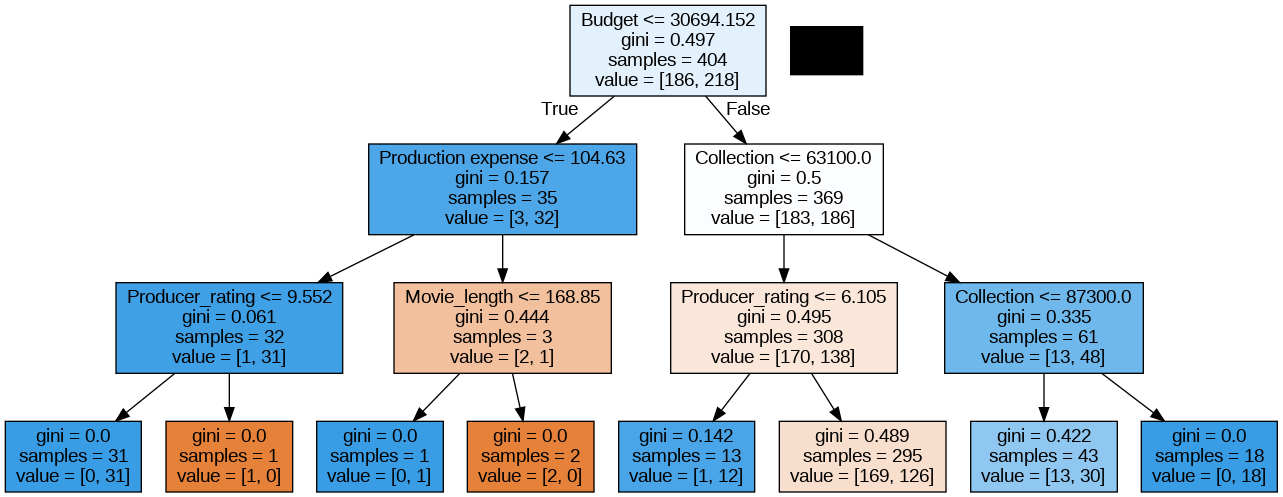

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

### Maximum number of levels in tree

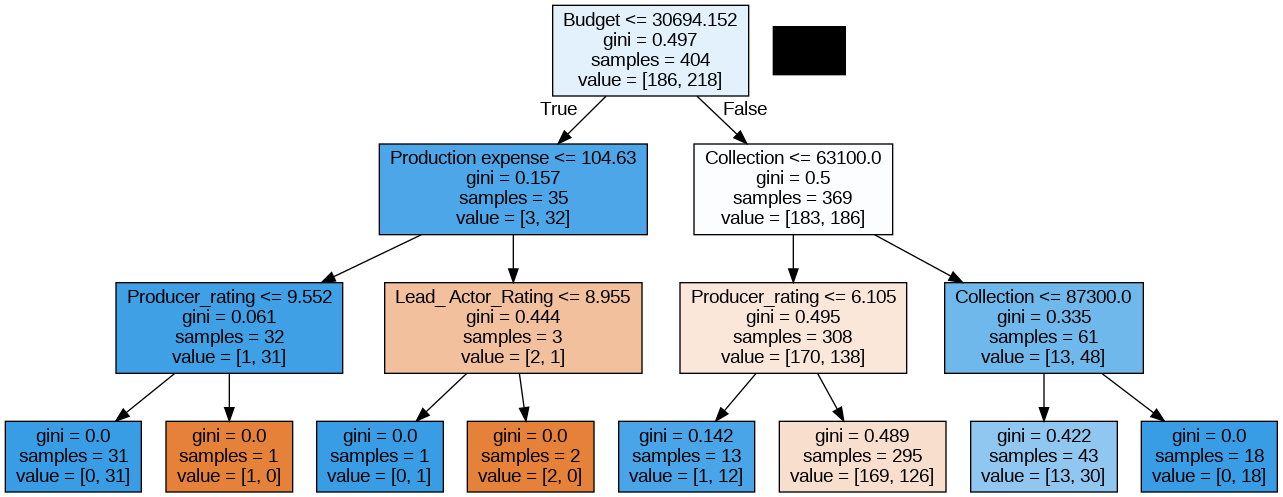

In [ ]:
clfTree1 = tree.DecisionTreeClassifier(max_depth = 3)
clfTree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree1, out_file=None,feature_names= x_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [ ]:
accuracy_score(y_test, clfTree1.predict(x_test))

0.5490196078431373

### Minimum observations at internal node

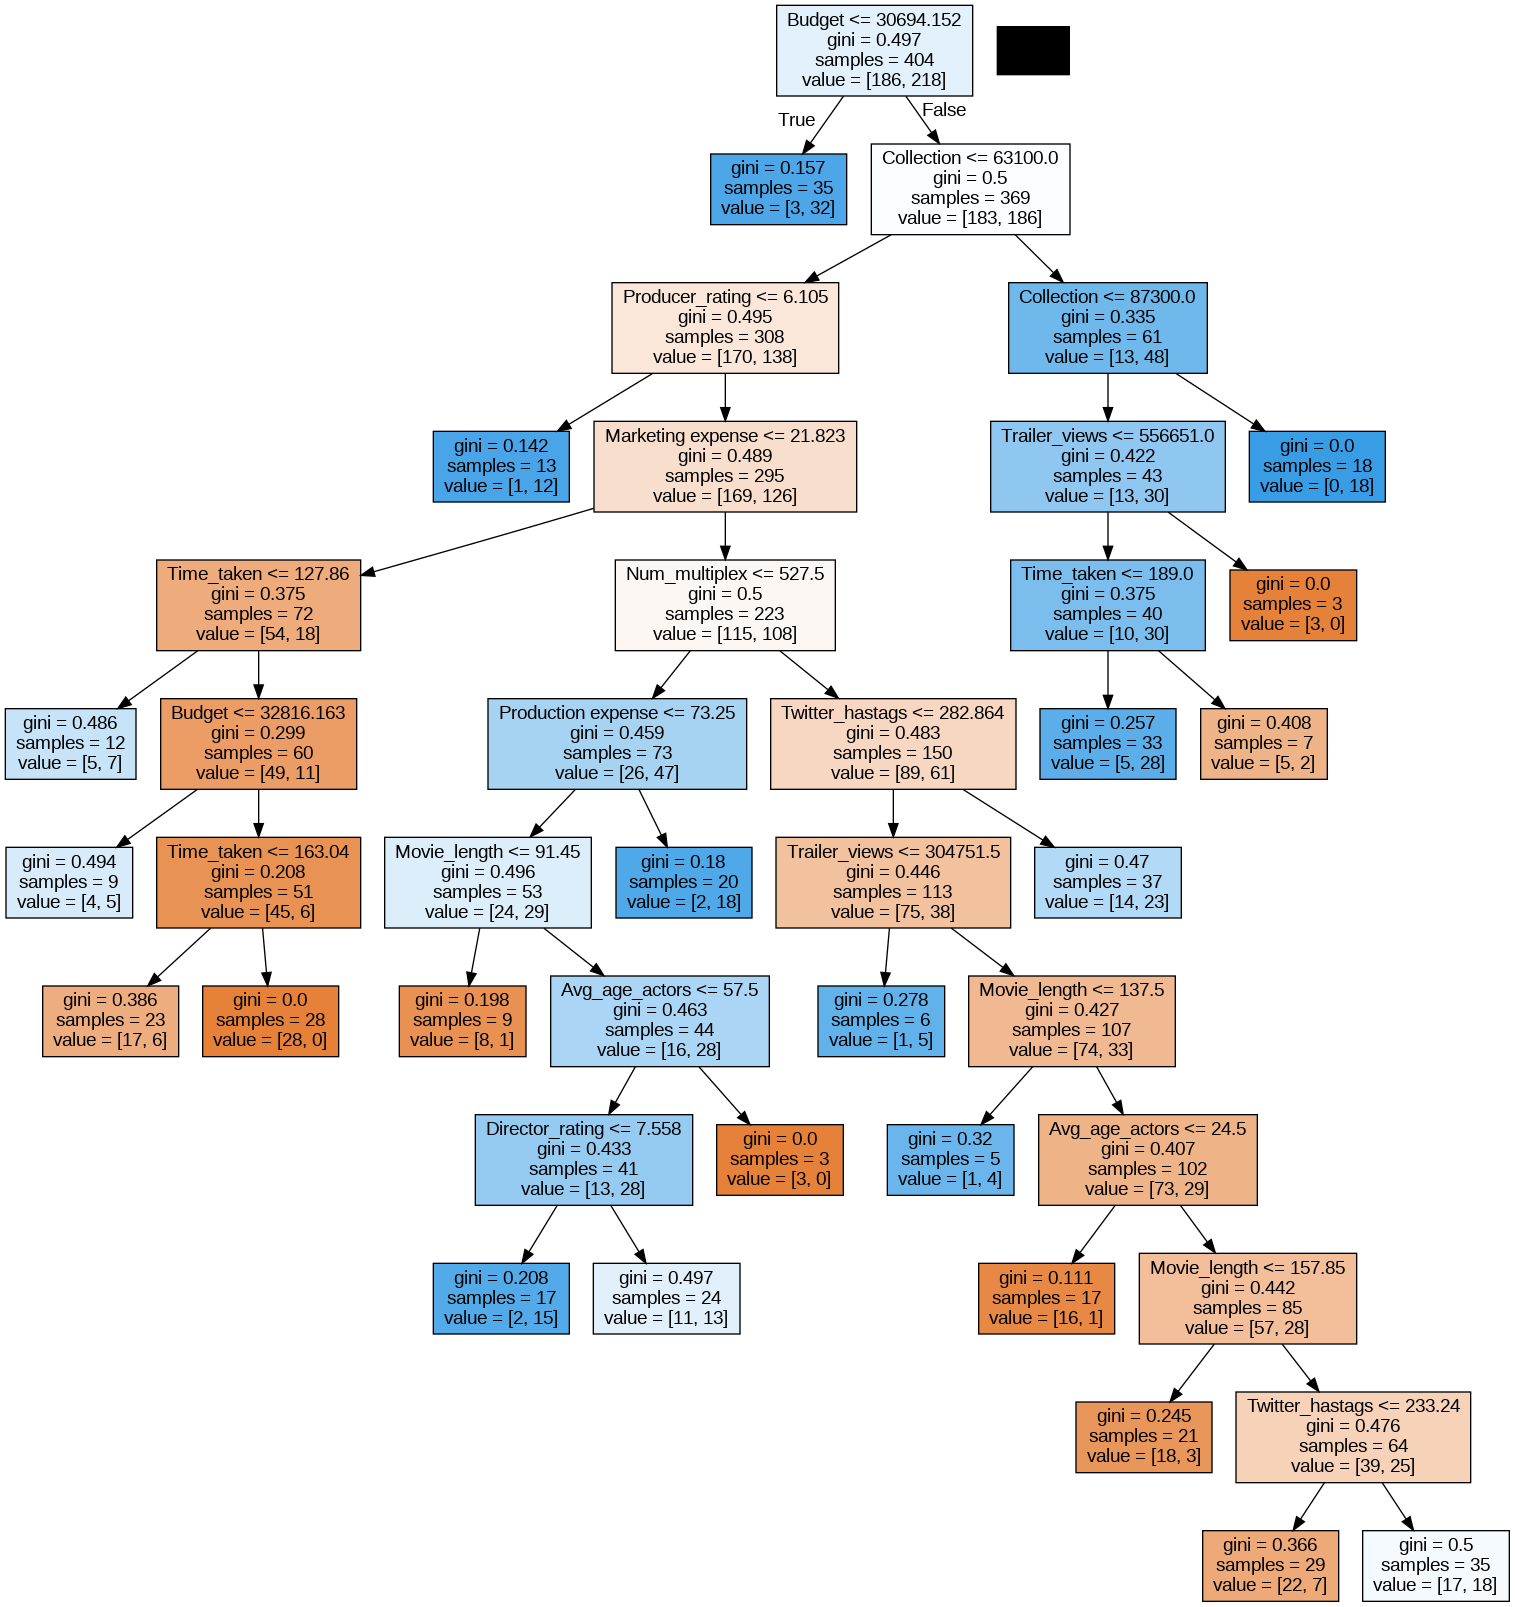

In [ ]:
clfTree2 = tree.DecisionTreeClassifier(min_samples_split = 40)
clfTree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
accuracy_score(y_test, clfTree2.predict(x_test))

0.6764705882352942

### Minimum observations at leaf node

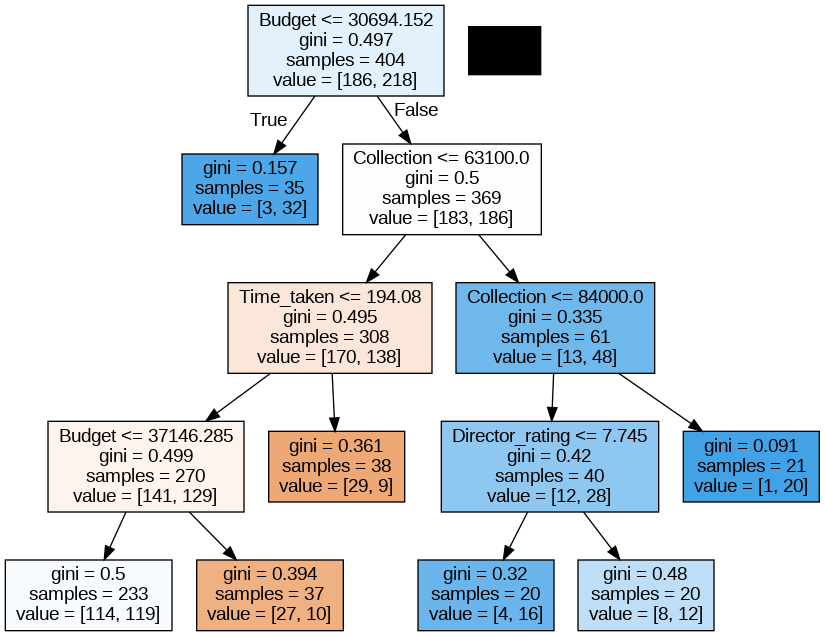

In [ ]:
clfTree3 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clfTree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(clfTree3, out_file=None,feature_names= x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [ ]:
accuracy_score(y_test, clfTree3.predict(x_test))

0.5588235294117647